<a href="https://colab.research.google.com/github/alecinvan/Colab_AI_tutorial/blob/main/MediSearch%E5%8C%BB%E7%96%97%E6%9C%BA%E5%99%A8%E4%BA%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="blue" size="6">构建一个医疗健康类的智能聊天机器人的几类方法：

- 利用模型嵌入和向量数据库进行智能查询。

- 利用GPT预训练模型进行模型微调。

- 利用开源预训练模型进行模型微调。



<font color="darkred" size="5">嵌入向量

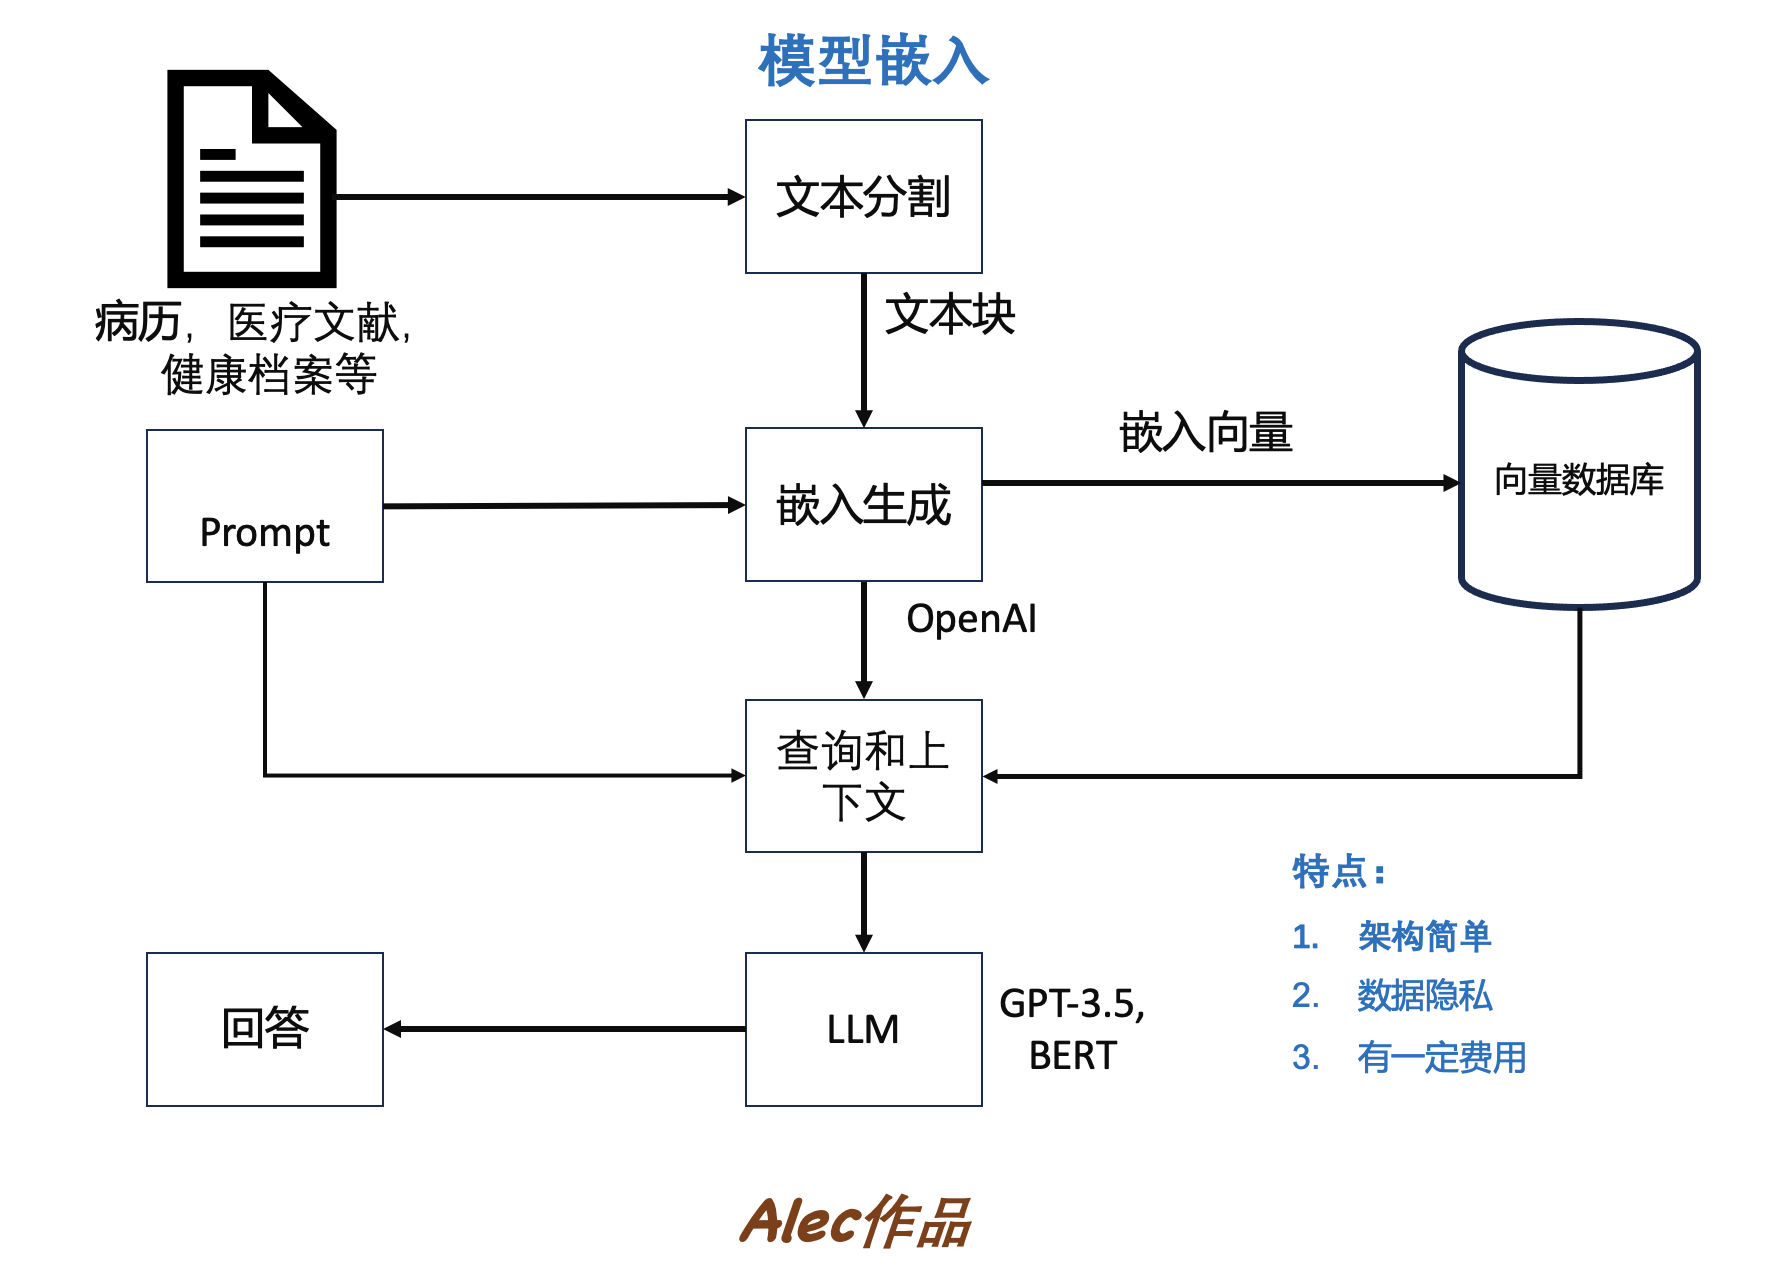

<font color="darkred" size="5">GPT微调

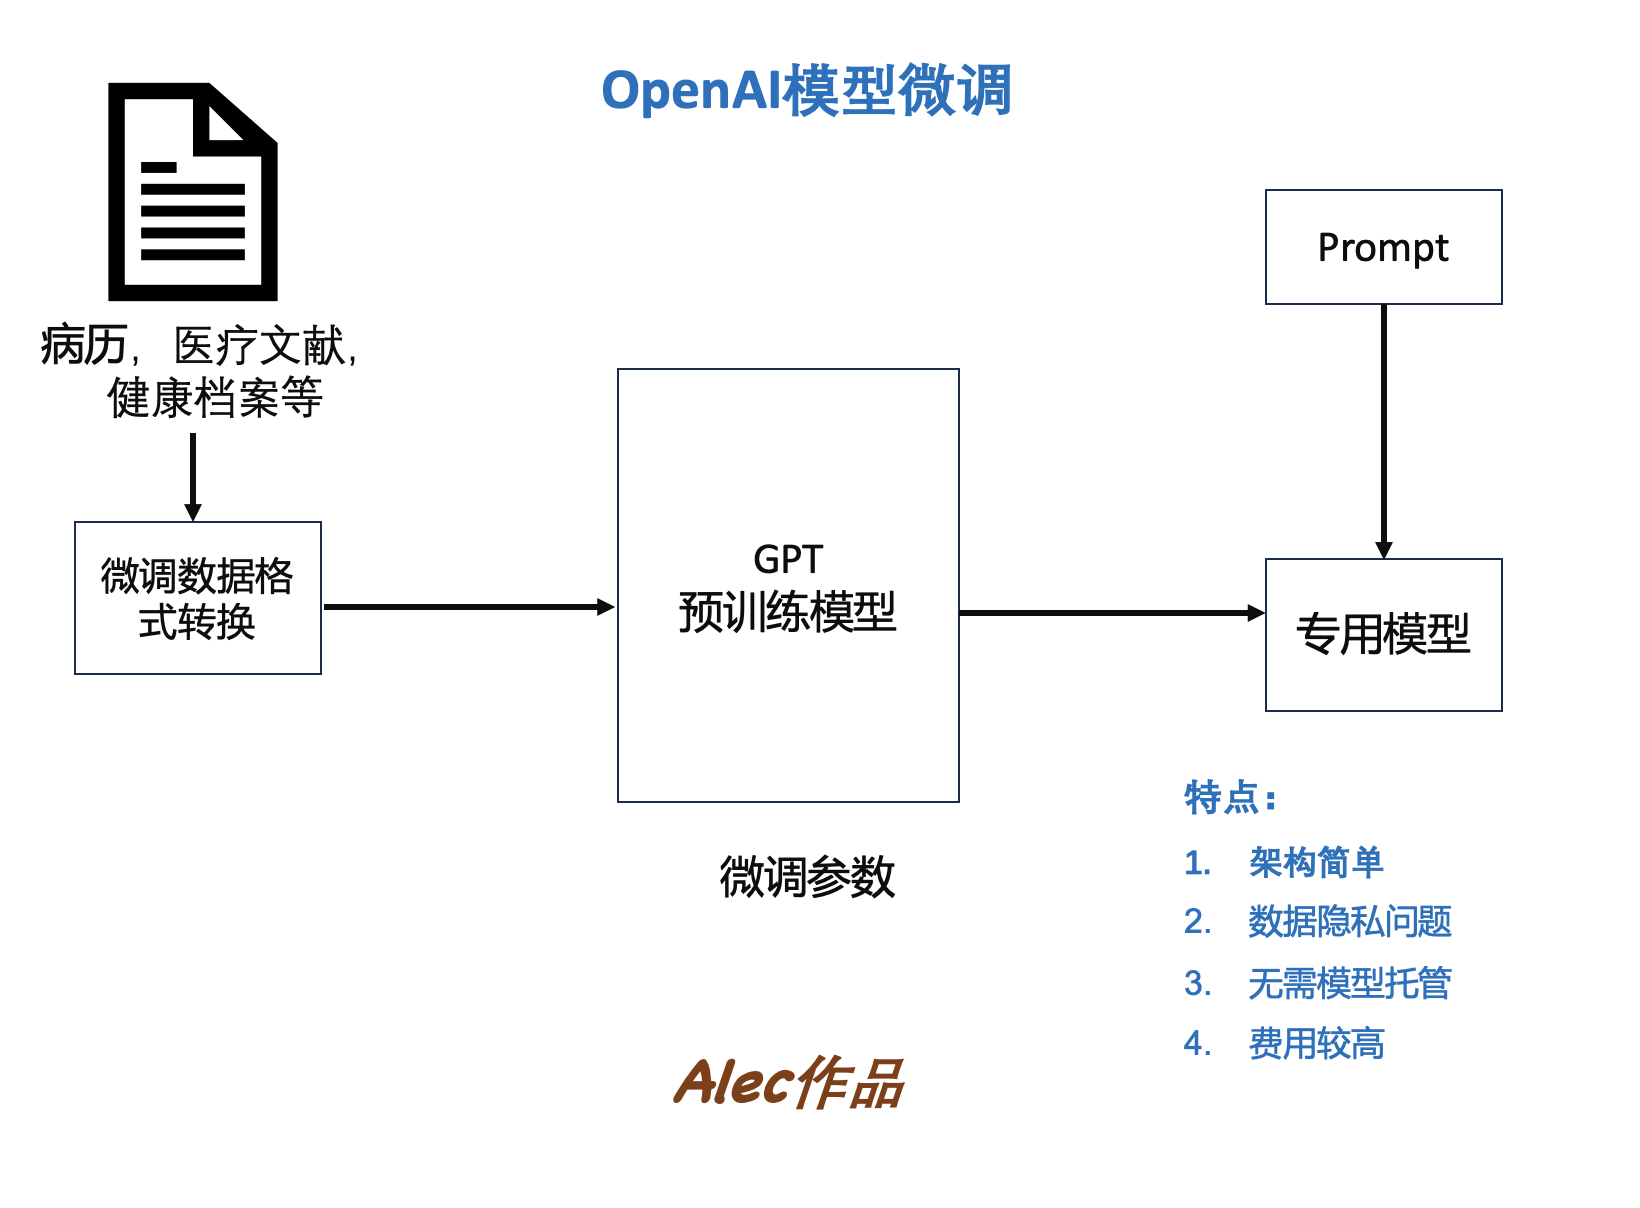

<font color="darkred" size="5">开源模型微调

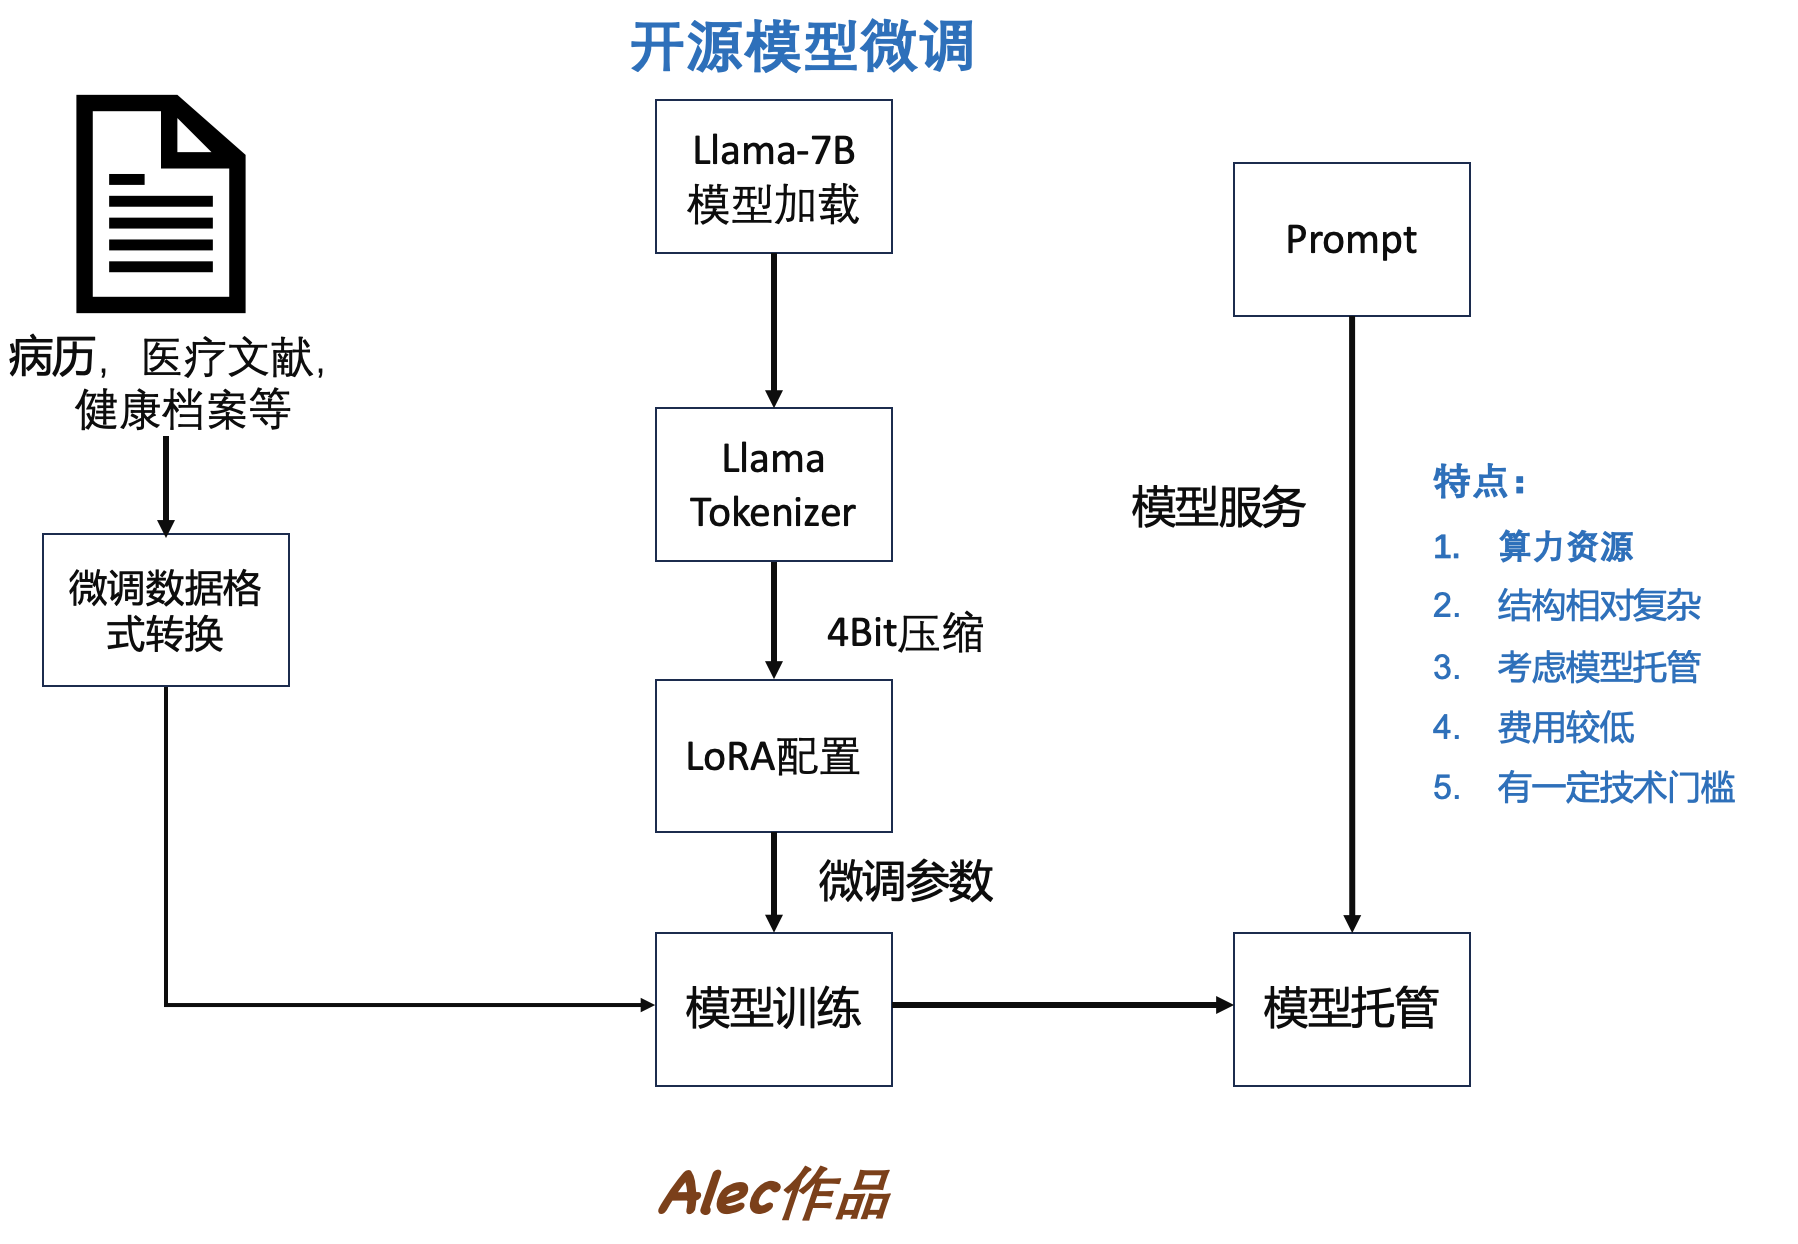

In [ ]:
!pip install medisearch_client

import json
import uuid

from medisearch_client import MediSearchClient

In [ ]:
api_key = "gx4XXBhE7Zrga682gmEm"
conversation_id = str(uuid.uuid4())
client = MediSearchClient(api_key=api_key)

In [ ]:
query = "Can depression be treated ?"
responses = client.send_user_message(conversation=[query],
                                     conversation_id=conversation_id,
                                     language="English",
                                     should_stream_response=False)

for response in responses:
  if response["event"] == "llm_response":
    text_response = response["text"]
    print(text_response)

Yes, depression can be treated, although it cannot be completely cured. Treatment options include therapy with a trained mental health professional, medications such as antidepressants, and alternative treatments like relaxation techniques and meditation. These treatments can improve symptoms and minimize their impact on daily life. However, depression often happens in episodes, so it's possible to have another episode later in life [1, 2].


In [ ]:
#follow_up_query

follow_up_query = "What are the symptoms?"
responses = client.send_user_message(conversation=[query,
                                                   text_response,
                                                   follow_up_query],
                                     conversation_id=conversation_id,
                                     language="English",
                                     should_stream_response=False)

responses

[{'event': 'llm_response',
  'id': '5af3c39c-2d65-4825-9eda-49c47156cbf4',
  'text': 'Depression symptoms can vary among different individuals and age groups. Common symptoms include feeling sad, anxious, or "empty", feeling hopeless or worthless, loss of interest in hobbies, decreased energy, difficulty concentrating, changes in sleep patterns, and appetite or weight changes. In severe cases, individuals may have thoughts of death or suicide. Symptoms can be different in males, females, and children. For example, males may experience anger, aggressiveness, or irritability, while females may experience irritability and changes in sleep patterns. Children may experience irritability, anger, or rapid shifts in mood [1].'},
 {'event': 'articles',
  'id': '5af3c39c-2d65-4825-9eda-49c47156cbf4',
  'articles': [{'title': 'Depression: What It Is, Symptoms, Causes, Treatment, and More',
    'url': 'https://www.healthline.com/health/depression',
    'authors': ['Valencia Higuera'],
    'year': 

In [ ]:
!pip install gradio -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 5.4 MB/s eta 0:

In [ ]:
import json
import uuid
import gradio as gr
from medisearch_client import MediSearchClient

def run_medisearch_chatbot(query, follow_up_query):
    api_key = "gx4XXBhE7Zrga682gmEm"
    conversation_id = str(uuid.uuid4())
    client = MediSearchClient(api_key=api_key)

    responses = client.send_user_message(conversation=[query],
                                         conversation_id=conversation_id,
                                         language="Chinese",
                                         should_stream_response=False)

    text_response = ""
    for response in responses:
        if response["event"] == "llm_response":
            text_response = response["text"]
            break

    if follow_up_query:
        responses = client.send_user_message(conversation=[query, text_response, follow_up_query],
                                             conversation_id=conversation_id,
                                             language="Chinese",
                                             should_stream_response=False)
        for response in responses:
            if response["event"] == "llm_response":
                text_response = response["text"]
                break

    return text_response

iface = gr.Interface(fn=run_medisearch_chatbot,
                     inputs=[gr.inputs.Textbox(label="输入您的问题:"),
                             gr.inputs.Textbox(label="输入后续查询（可选）:")],
                     outputs=gr.outputs.Textbox(label="回复:"),
                     title="<span style='font-style: italic; font-weight: bold; color: darkred;'>Alec作品</span> - MediSearch 医疗聊天机器人",
                     description="使用 MediSearch 和 GPT-3.5 提出医疗问题并获得答案。")

iface.launch(share=True, debug=True)


<ipython-input-12-061f25e3e0e1>:35: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=[gr.inputs.Textbox(label="输入您的问题:"),
<ipython-input-12-061f25e3e0e1>:35: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=[gr.inputs.Textbox(label="输入您的问题:"),
<ipython-input-12-061f25e3e0e1>:35: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs=[gr.inputs.Textbox(label="输入您的问题:"),
<ipython-input-12-061f25e3e0e1>:36: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Textbox(label="输入后续查询（可选）:")],
<ipython-input-12-061f25e3e0e1>:36: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Textbox(label="输入后续查询（可选）:")],
<ipython-input-12-061f25e3e0e1>:36

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://54fb5f2d4e92336f5b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
